<a href="https://www.kaggle.com/code/eduardolicea/healthcare-dataset-eda?scriptVersionId=229578389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. [Introduction](#introduction)
2. [Data Inspection](#data-inspection)
3. [Exploratory Data Analysis (EDA)](#eda)
4. [Data Cleaning](#data-cleaning)
5. [Visualizations](#visualizations)
6. [Insights](#insights)

<a id="introduction"></a>
#### <span>Introduction</span>
<div class="alert alert-block ">
    <pre style="background-color: black; color: white; padding: 10px; border-radius: 5px; white-space: pre-wrap; word-wrap: break-word;">
"The goal of this exploratory data analysis is to uncover key trends and patterns in hospital admissions, patient demographics, medical conditions, and financial aspects of healthcare utilization. By analyzing patient visits, billing amounts, and common medical conditions, I aim to provide insights into patient demographics, financials, and patient care."
    </pre>
</div>

In [1]:
pip install --upgrade pandas seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("/kaggle/input/healthcare-dataset/modified_healthcare_dataset.csv")

<a id="data-inspection"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-size: 24px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 95%;
">
Data Inspection
</div>

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,328,Emergency,2024-02-07,Azithromycin,Normal,7
1,Leslie Terry,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,265,Emergency,2019-08-22,Tamiflu,Abnormal,2
2,Danny Smith,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,205,Elective,2022-10-30,Cisplatin,Inconclusive,38
3,Andrew Watts,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,450,Elective,2020-11-19,Prednisone,Normal,1
4,Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38


In [5]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
55495,Elizabeth Jackson,62,Male,AB-,Cancer,2020-08-16,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,417,Urgent,2020-09-26,Doxorubicin,Abnormal,41
55496,Kyle Perez,63,Male,A+,Heart Disease,2020-01-23,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,316,Emergency,2020-03-07,Statins,Abnormal,44
55497,Heather Wang,28,Female,O+,Asthma,2020-07-13,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,347,Elective,2020-07-16,Montelukast,Normal,3
55498,Jennifer Jones,75,Male,O+,Cancer,2019-05-25,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,321,Emergency,2019-07-11,Methotrexate,Abnormal,47
55499,James Garcia,53,Female,O+,Diabetes,2024-04-02,Dennis Warren,Loyola University Medical Center,Cigna,15953.455966,448,Emergency,2024-04-12,Insulin,Abnormal,10


In [6]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay'],
      dtype='object')

In [7]:
df.shape

(55500, 16)

In [8]:
df.size

888000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
 15  Length of Stay      55500 non-null  int64  
dtypes: f

In [10]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
dtype: int64

<a id="eda"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-size: 24px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 95%;
">
Exploratory Data Analysis (EDA)
</div>

In [11]:
df.describe()

,Age,Billing Amount,Room Number,Length of Stay
count,55500.000000,55500.000000,55500.000000,55500.000000
mean,48.001622,21835.044635,301.134829,17.841009
std,21.105827,23574.413594,115.243069,20.272294
min,5.000000,500.220989,101.000000,1.000000
25%,32.000000,4195.525741,202.000000,4.000000
50%,50.000000,11089.537763,302.000000,8.000000
75%,65.000000,35887.703406,401.000000,28.000000
max,90.000000,99997.797977,500.000000,89.000000


<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><b>Age Range:</b> 5 to 90 (Average: 48)</li>
        <li><b>Admission Dates:</b> 2019-05-08 – 2024-05-07</li>
        <li><b>Discharge Dates:</b> 2019-05-09 – 2024-07-28</li>
        <li><b>Billing Amounts:</b> \$500 to \$99,998 (Average: $21,835)</li>
        <li><b>Room Numbers:</b> 101 to 500</li>
        <li><b>Length of Stay:</b> 1 to 89 days (Average: 18)</li>
    </ul>
</div>

In [12]:
df.describe(include= "object").T

,count,unique,top,freq
Name,55500,40235,Michael Williams,24
Gender,55500,2,Female,27955
Blood Type,55500,8,O+,15696
Medical Condition,55500,8,Flu,7046
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,4,Northwestern Memorial Hospital,14070
Insurance Provider,55500,5,Cigna,11183
Admission Type,55500,4,Emergency,20104
Discharge Date,55500,1901,2022-02-04,53


<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><b>Most Frequent Patient:</b> Michael Williams (Visited 24 Times)</li>
        <li><b>Most Common Gender:</b> Female (27,955 patients)</li>
        <li><b>Most Common Blood Type:</b> O+ (15,696 patients)</li>
        <li><b>Most Frequent Medical Condition:</b> Flu (7,046 cases)</li>
        <li><b>Doctor With the Highest Number Of Patients:</b> Michael Smith (Attended 27 Patients)</li>
        <li><b>Most Common Hospital:</b> Northwestern Memorial Hospital (14,070 patients)</li>
        <li><b>Most Common Insurance Provider:</b> Cigna (11,183 patients)</li>
        <li><b>Most Common Admission Type:</b> Emergency (20,104 admissions)</li>
        <li><b>Most Common Medication:</b> Metformin (4,653 prescriptions)</li>
        <li><b>Most Frequent Test Results:</b> Abnormal (27,784 cases)</li>
    </ul>
</div>

In [13]:
df['Gender'].value_counts()

Gender
Female    27955
Male      27545
Name: count, dtype: int64

In [14]:
df['Blood Type'].value_counts()

Blood Type
O+     15696
A+     15573
B+      5457
AB-     4485
B-      4408
O-      3341
A-      3301
AB+     3239
Name: count, dtype: int64

In [15]:
df['Medical Condition'].value_counts()

Medical Condition
Flu              7046
Diabetes         7005
Obesity          6994
Cancer           6940
Asthma           6908
Heart Disease    6900
Alzheimer’s      6861
Infections       6846
Name: count, dtype: int64

In [16]:
df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11183
UnitedHealthcare    11142
Blue Cross          11134
Medicare            11038
Aetna               11003
Name: count, dtype: int64

In [17]:
df['Admission Type'].value_counts()

Admission Type
Emergency    20104
Elective     13280
Urgent       11816
Routine      10300
Name: count, dtype: int64

In [18]:
df['Medication'].value_counts()

Medication
Metformin        4653
Zanamivir        2391
Methotrexate     2375
Glipizide        2362
Orlistat         2351
Insulin          2340
Aspirin          2337
Prednisone       2333
Oseltamivir      2329
Tamiflu          2326
Montelukast      2313
Azithromycin     2312
Memantine        2312
Amoxicillin      2311
Beta-blockers    2297
Doxorubicin      2296
Phentermine      2293
Donepezil        2292
Cisplatin        2269
Statins          2266
Albuterol        2262
Rivastigmine     2257
Ciprofloxacin    2223
Name: count, dtype: int64

In [19]:
df['Test Results'].value_counts()

Test Results
Abnormal        27784
Normal          17453
Inconclusive    10263
Name: count, dtype: int64

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><b>Gender Distribution:</b> Male & Female</li>
        <li><b>Blood Type Distribution:</b> A-, A+, AB+, AB-, B+, B-, O+, O-</li>
        <li><b>Medical Conditions & Medication Categories:</b> Arthritis, Diabetes, Hypertension, Obesity, Cancer, Asthma, Heart Disease, Infections</li>
        <li><b>Insurance Providers:</b> Cigna, Medicare, UnitedHealthcare, Blue Cross, Aetna</li>
        <li><b>Admission Types:</b> Elective (Non-Emergency), Routine, Urgent, Emergency</li>
        <li><b>Frequently Prescribed Medications:</b> Metformin, Zanamivir, Ibuprofen, Aspirin, Amoxicillin</li>
    </ul>
</div>

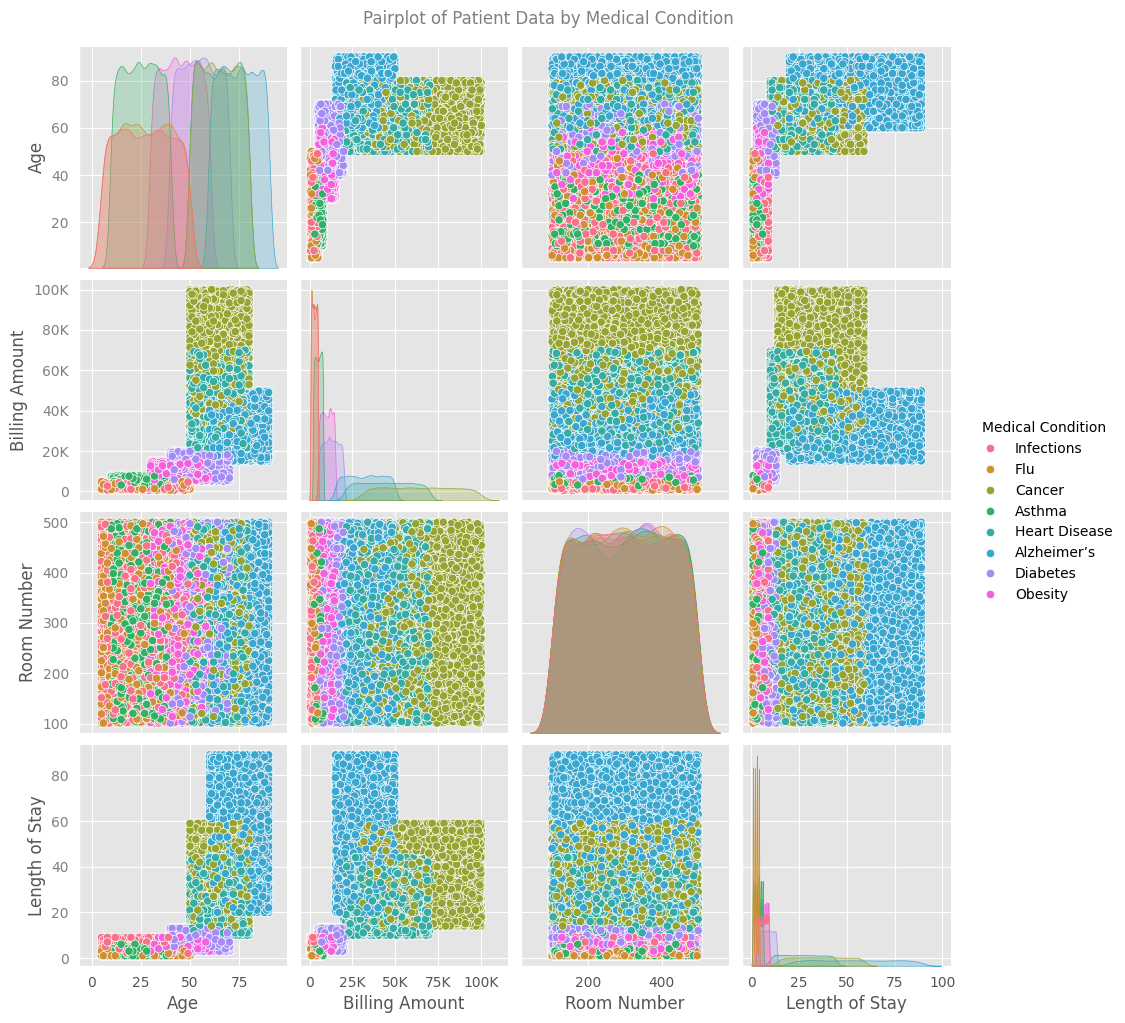

In [20]:
# As we know a pairplot enables the visualization of the relationship between specified pairs of variables in a dataset.

pair = sns.pairplot(df, hue="Medical Condition")

for ax in pair.axes.flatten():
    ax.tick_params(axis='y', labelcolor='grey')
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K' if x >= 1000 else f'{int(x)}'))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, pos: f'{y/1000:.0f}K' if y >= 1000 else f'{int(y)}'))
    ax.tick_params(axis='x', bottom=False)
    ax.tick_params(axis='y', left=False)
    
pair._legend.set_title("Medical Condition")
pair.fig.suptitle("Pairplot of Patient Data by Medical Condition", fontweight="ultralight", color="grey", y=1.02)

plt.show()

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li>Younger patients are generally associated with lower billing amounts and shorter hospital stays, primarily due to less severe, acute conditions such as infections, asthma, and influenza.</li> 
        <li>In contrast, older patients tend to incur significantly higher healthcare costs and experience longer lengths of stay—particularly when diagnosed with chronic conditions like Alzheimer’s, cancer, and heart disease.</li> 
        <li>These long-term conditions often require extended treatment and monitoring, leading to prolonged room occupancy.</li>
    </ul>
</div>

<a id="data-cleaning"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-size: 24px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 95%;
">
Data Cleaning
</div>

In [21]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results', 'length_of_stay'],
      dtype='object')

In [22]:
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])

print(df['date_of_admission'].dtypes, df['discharge_date'].dtypes)

datetime64[ns] datetime64[ns]


<a id="visualizations"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-size: 24px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 95%;
">
Visualizations
</div>

In [23]:
numerical_columns = ['age', 'billing_amount', 'room_number']
numerical_columns_titles = ['Age', 'Billing Amount', 'Room Number']


object_columns = ['gender', 'blood_type', 'medical_condition', 'hospital', 
       'insurance_provider', 'admission_type', 'test_results']
object_columns_titles = ['Gender', 'Blood Type', 'Medical Condition', 'Hospital',
       'Insurance Provider', 'Admission Type', 'Test Results']

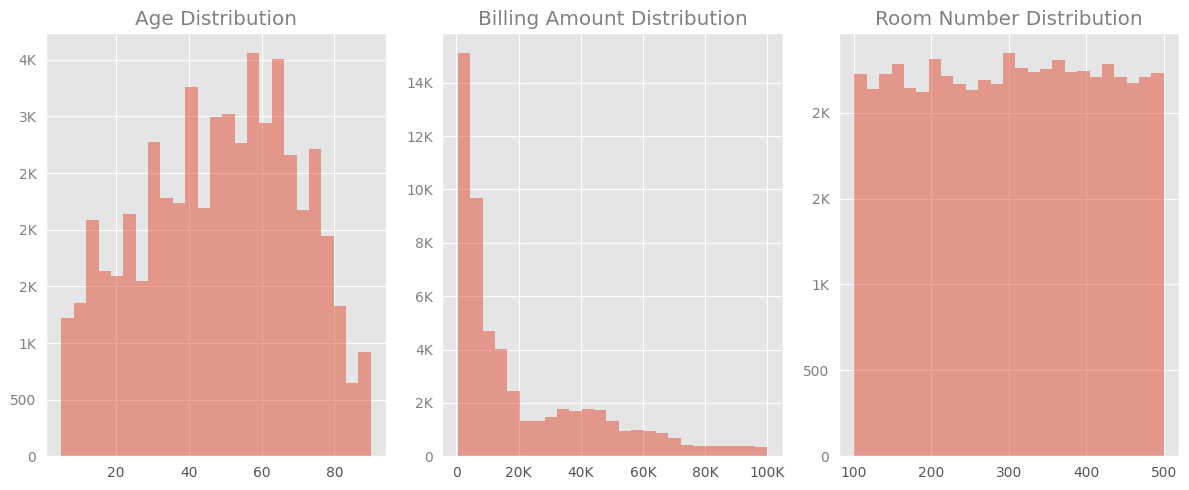

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(12, 5))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=25, kde=False, ax=axes[i], edgecolor=None, alpha=.5)
    axes[i].set_title(f'{numerical_columns_titles[i]} Distribution', fontweight="ultralight", color="grey")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelcolor='grey')
    axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
    axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
    axes[i].tick_params(axis='x', bottom=False)
    axes[i].tick_params(axis='y', left=False)
    
plt.tight_layout()
plt.show()

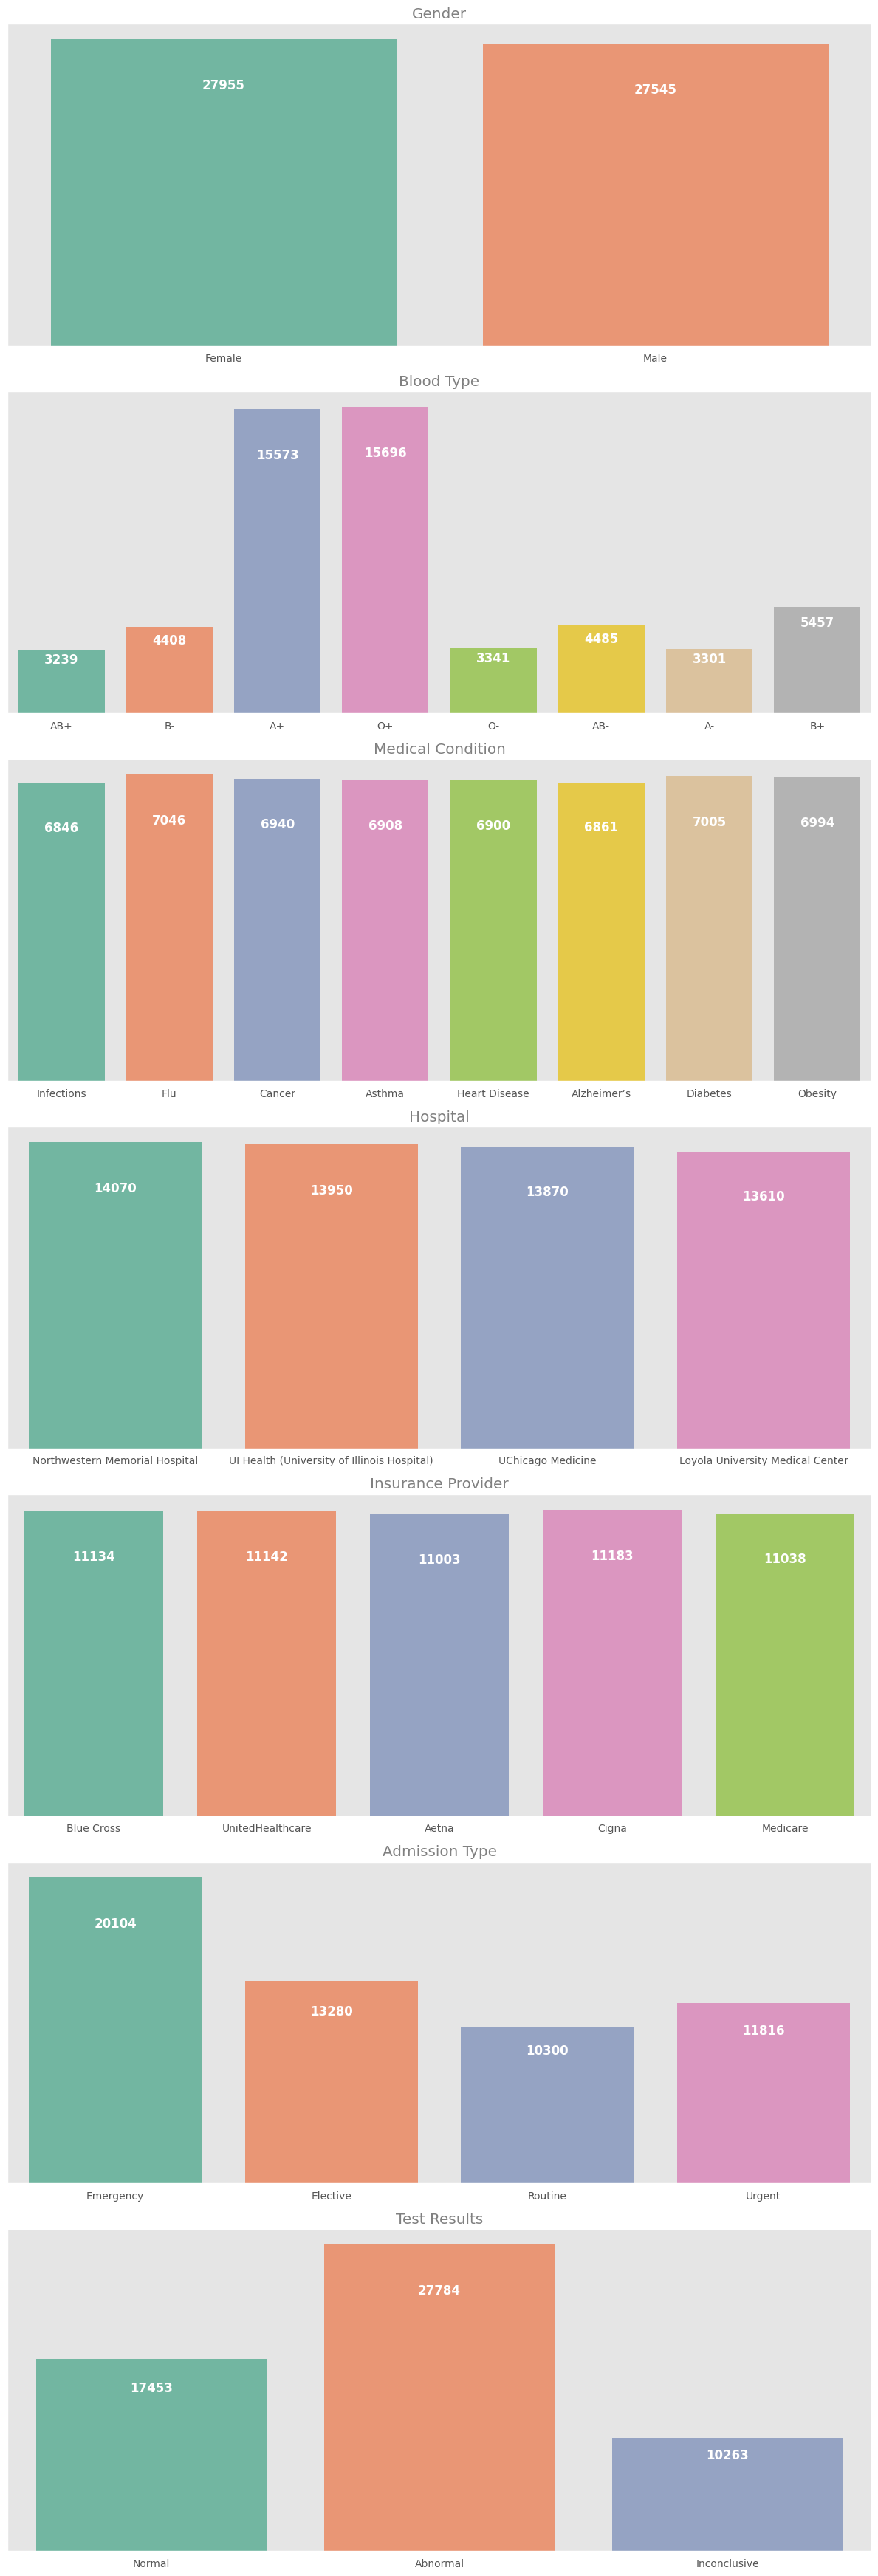

In [25]:
fig, axes = plt.subplots(len(object_columns), 1, figsize=(12, 5 * len(object_columns)))

for i, col in enumerate(object_columns):
    ax = sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette='Set2')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.85),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

    ax.set_title(object_columns_titles[i], fontweight="ultralight", color="grey")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.tick_params(axis='x', bottom=False)
    ax.set_xticks(ax.get_xticks())


plt.tight_layout()
plt.show()

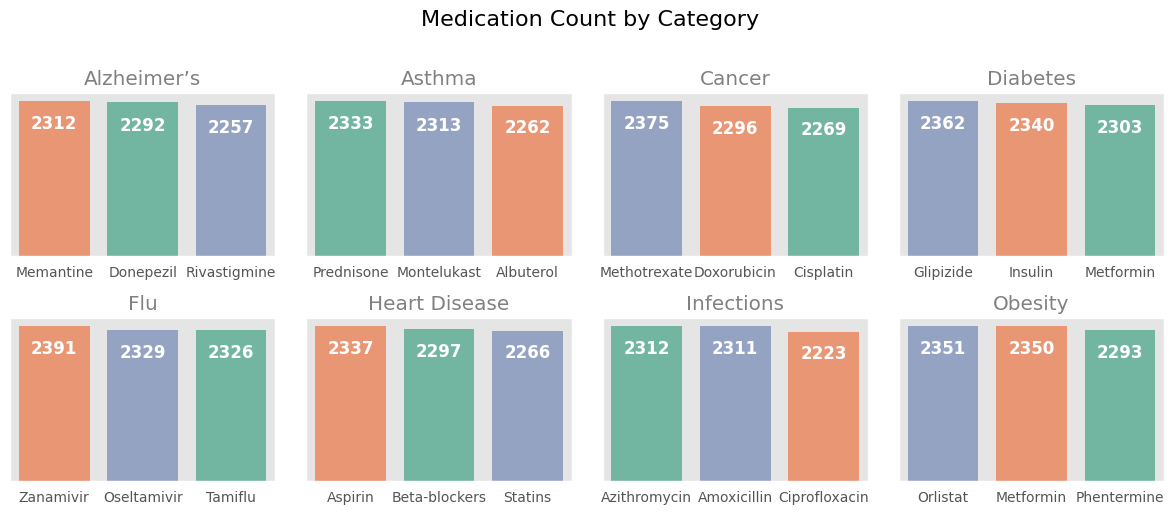

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(12, 5))

for ax, (category, subset) in zip(axes.flatten(), df.groupby('medical_condition')):
    sns.countplot(
        data=subset,
        x='medication',
        hue='medication',
        order=subset['medication'].value_counts().index,
        palette='Set2',
        legend=False,
        ax=ax
    )
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.85),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')
    
    ax.set_title(category, fontweight='ultralight', color='grey')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', bottom=False)
    ax.set_yticks([])


fig.suptitle('Medication Count by Category', color='black', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<a id="insights"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-size: 24px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 95%;
">
Insights
</div>

## Financial Insights & Billing Trends

#### Billing Amounts by Age

In [27]:
# Which age range is associated with the highest hospital costs?

age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']

df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

billing_by_age_range = df.groupby('age_range', observed=False)['billing_amount'].mean().sort_values(ascending=False)

highest_billing_age_range = billing_by_age_range.idxmax()
highest_billing_amount = billing_by_age_range.max()

billing_by_age_range

age_range
76-100    41895.849678
61-75     39969.921398
46-60     25313.848675
31-45      6360.781807
19-30      3711.342014
0-18       3465.086254
Name: billing_amount, dtype: float64

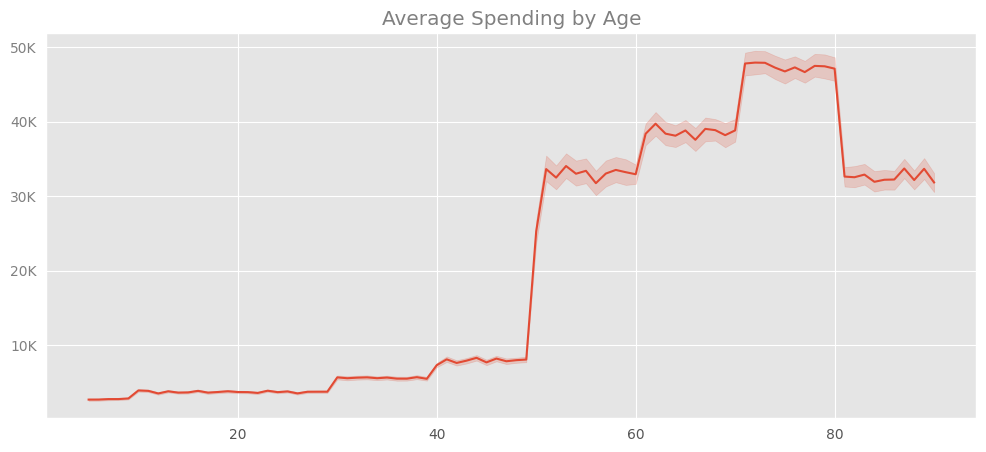

In [28]:
plt.figure(figsize=(12,5))

ax = sns.lineplot(x=df['age'], y=df['billing_amount'])

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.tick_params(axis='y', labelcolor='grey')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', bottom=False)

plt.title('Average Spending by Age', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

The age range associated with the highest hospital costs is 76-100 with an average billing amount of $41,896.

#### Billing Amounts by Medical Condition

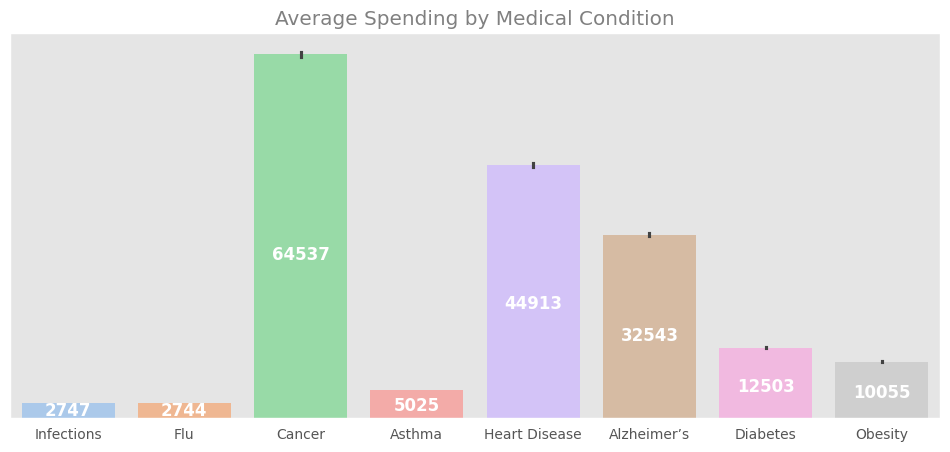

In [29]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x=df['medical_condition'], y=df['billing_amount'], hue=df['medical_condition'], palette="pastel")

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.45),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

plt.title('Average Spending by Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [30]:
# Which medical conditions are associated with the highest and most variable hospital costs?

billing_by_medical_condition = df.groupby('medical_condition')['billing_amount'].mean().round(0).astype(int).sort_values(ascending=False)
print('Top 5 Average Billing Amounts by Medidcal Condition')

billing_by_medical_condition.head()

Top 5 Average Billing Amounts by Medidcal Condition


medical_condition
Cancer           64537
Heart Disease    44913
Alzheimer’s      32544
Diabetes         12503
Obesity          10056
Name: billing_amount, dtype: int64

<h3 style="margin-bottom: 10px; font-weight: bold;">Insights on Average Billing Amounts by Medical Condition</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><b>Cancer</b> is associated with the highest hospital costs, averaging <b>\$64,537</b> per patient. This is likely due to the complexity and intensity of cancer treatments such as surgery, chemotherapy, and radiation.
</li>
        <li><b>Heart Disease</b> ranks second, with an average billing of <b>\$44,913</b>, reflecting the cost of emergency care, cardiac procedures, long hospital stays, and follow-up treatments.</li>
        <li><b>Alzheimer’s</b> comes next at <b>\$32,544</b>, indicating significant resource use likely due to long-term care, monitoring, and support services.
</li>
        <li><b>Diabetes</b> patients incur an average cost of <b>\$12,503</b>, tied to chronic disease management, complications like infections or amputations, and regular hospital visits.
</li>
        <li><b>Obesity</b> averages <b>\$10,056</b>, which may involve planned procedures like bariatric surgery or treatment of obesity-related complications.
</li>
    </ul>
</div>

#### Billing Amounts by Gender

In [31]:
#Which gender is associated with the highest hospital costs?

billing_by_gender = df.groupby('gender')['billing_amount'].mean()

highest_billing_gender = billing_by_gender.idxmax()
highest_billing_amount = billing_by_gender.max()

print(f"The gender associated with the highest billing amount is {highest_billing_gender} with an average billing amount of ${highest_billing_amount:,.0f}.")

The gender associated with the highest billing amount is Female with an average billing amount of $21,913.


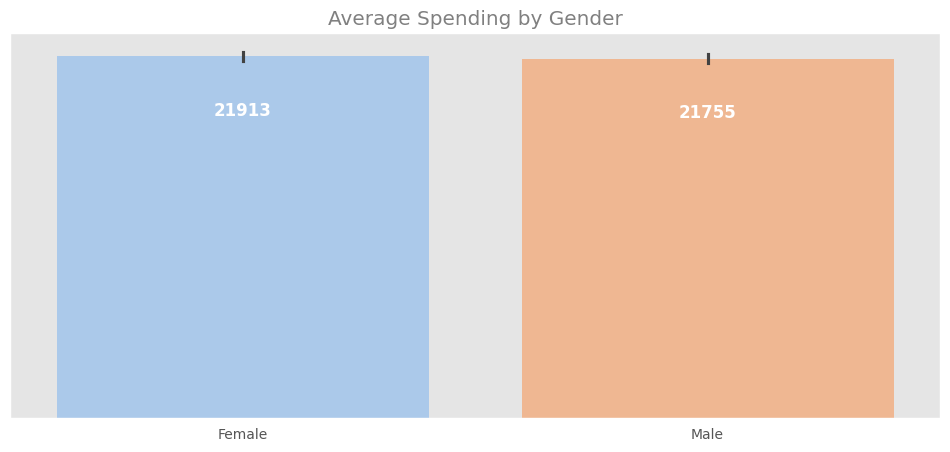

In [32]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x=df['gender'], y=df['billing_amount'], hue=df['gender'], palette="pastel")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.85),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

plt.title('Average Spending by Gender', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

## Patient Demographics & Admissions

#### Age Distribution by Medical Condition

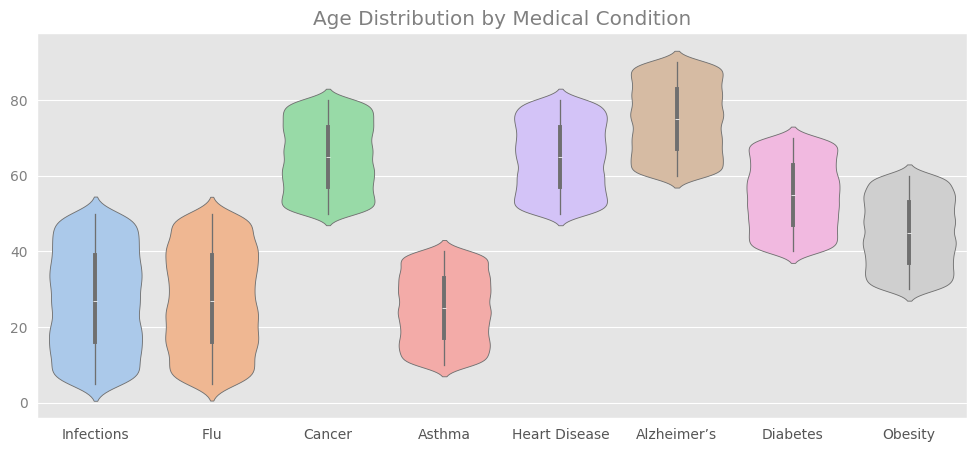

In [33]:
plt.figure(figsize=(12,5))

ax = sns.violinplot(x='medical_condition', hue='medical_condition', y='age', data=df, palette="pastel")
ax.tick_params(axis='y', labelcolor='grey', left=False)
ax.tick_params(axis='x', bottom=False)

plt.title('Age Distribution by Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [34]:
# How does the average age of patients vary across different medical conditions?

age_by_condition = df.groupby('medical_condition')['age'].mean().sort_values(ascending=False).astype(int)

age_by_condition

medical_condition
Alzheimer’s      74
Cancer           64
Heart Disease    64
Diabetes         54
Obesity          45
Flu              27
Infections       27
Asthma           24
Name: age, dtype: int64

<h3 style="margin-bottom: 10px; font-weight: bold;">Insights on Average Age by Medical Condition</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><b>Alzheimer’s</b> patients have the highest average age at <b>74</b> years, which is expected given that Alzheimer’s is a degenerative condition primarily affecting older adults.
</li>
        <li><b>Cancer</b> and <b>Heart Disease</b> both show an average patient age of <b>64</b>, reflecting their prevalence among older adults, typically in late middle age or seniors.</li>
        <li><b>Diabetes</b> patients average <b>54</b> years, aligning with the chronic nature of the disease which often develops in middle adulthood.
</li>
        <li><b>Obesity</b> is most common among patients aged <b>45</b>, indicating earlier onset and increasing prevalence in younger adults.
</li>
        <li><b>Flu</b> and <b>Infections</b> both have an average patient age of <b>27</b>, suggesting these conditions affect a younger, possibly more active or exposed population.
</li>
        <li><b>Asthma</b> has the youngest average age at <b>24</b>, which is consistent with asthma often being diagnosed in childhood or early adulthood.
</li>
    </ul>
</div>

#### Gender Distribution per Medical Condition

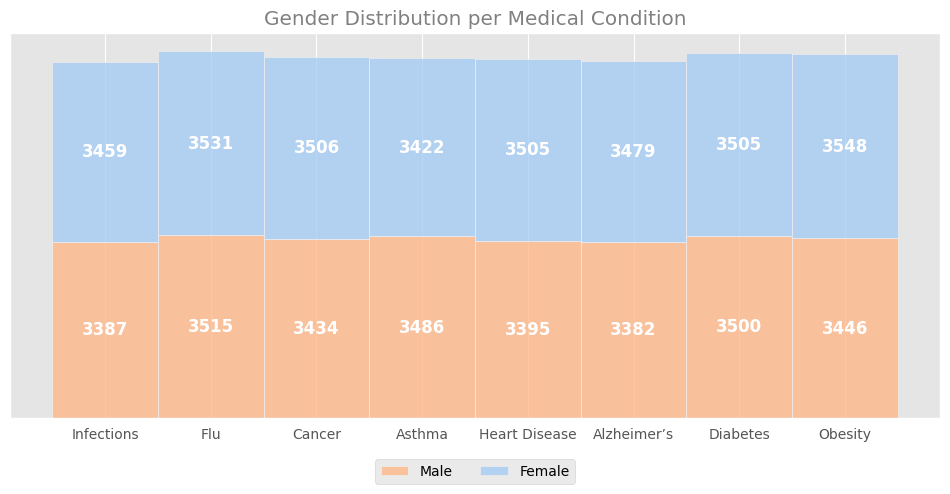

In [35]:
plt.figure(figsize=(12,5))

ax = sns.histplot(x='medical_condition', data=df, hue="gender", palette='pastel', multiple="stack")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        (bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.),  
                        ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

plt.title('Gender Distribution per Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.legend(['Male', 'Female'], loc='lower center', bbox_to_anchor=(0.5, -0.19), ncol=2)
plt.show()

In [36]:
# Are there significant gender disparities in the prevalence of different medical conditions?

print("There aren't any significant disparities, the distribution appears to be even.")

There aren't any significant disparities, the distribution appears to be even.


#### Admissions by Hospital

In [37]:
# Which hospitals handle the most patient admissions, and which are the least utilized?

hospital_admissions = df['hospital'].value_counts()

most_utilized_hospital = hospital_admissions.idxmax()
most_utilized_count = hospital_admissions.max()

least_utilized_hospital = hospital_admissions.idxmin()
least_utilized_count = hospital_admissions.min()

print(f"The most utilized hospital is {most_utilized_hospital} with {most_utilized_count} admissions.")
print(f"The least utilized hospital is {least_utilized_hospital} with {least_utilized_count} admissions.")


The most utilized hospital is Northwestern Memorial Hospital with 14070 admissions.
The least utilized hospital is Loyola University Medical Center with 13610 admissions.


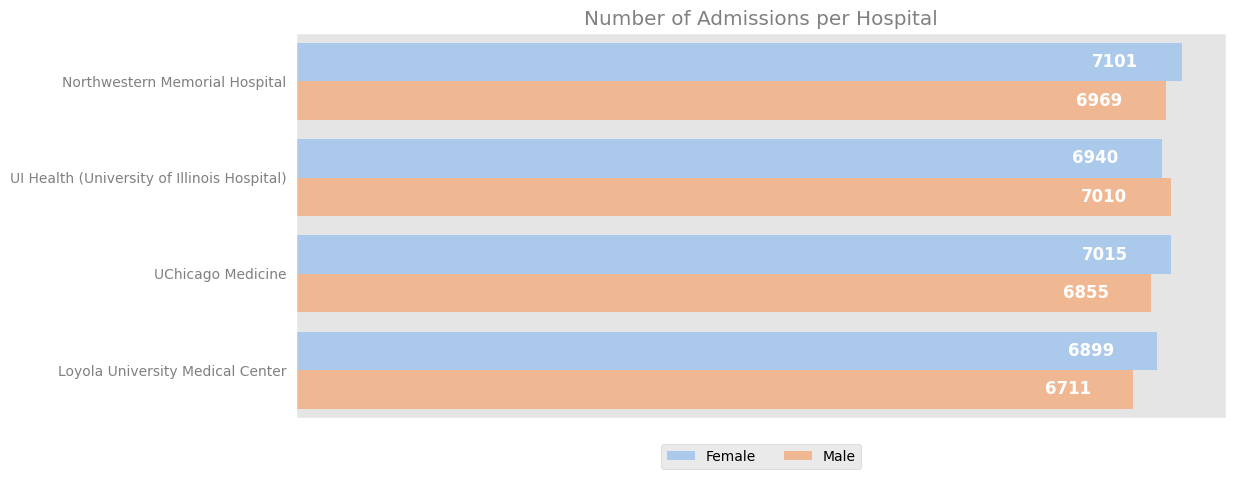

In [38]:
plt.figure(figsize=(12,5))

ax = sns.countplot(y='hospital', data=df, hue='gender', order=df['hospital'].value_counts().index, palette="pastel")
ax.set_xticks([])
ax.tick_params(axis='y', labelcolor='grey', left=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() - (p.get_width() * 0.05), p.get_y() + p.get_height() / 2.), 
                ha='right', va='center', fontsize=12, fontweight='semibold', color='white')
    
plt.title('Number of Admissions per Hospital', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

## Hospital Operations & Patient Flow

#### Admission Type by Condition

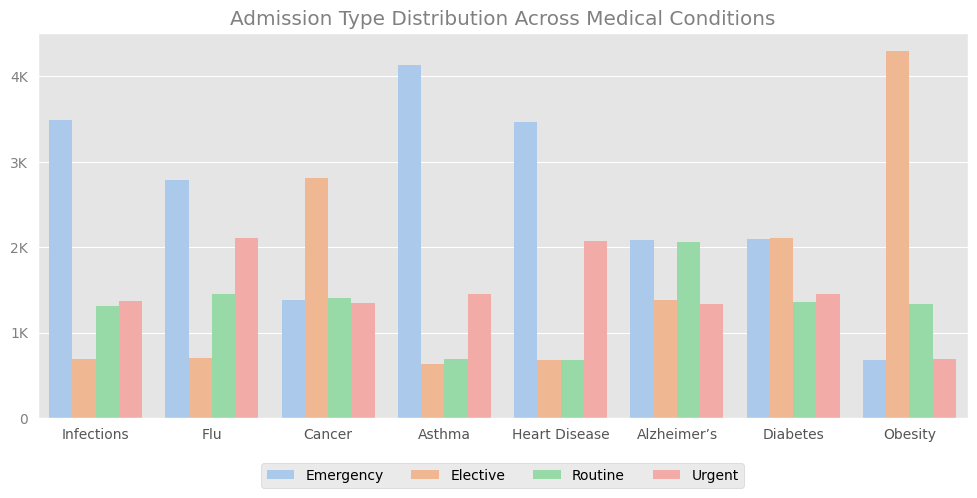

In [39]:
plt.figure(figsize=(12,5))

ax = sns.countplot(x='medical_condition', hue='admission_type', data=df, palette="pastel")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.tick_params(axis='y', labelcolor='grey')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', bottom=False)

plt.title('Admission Type Distribution Across Medical Conditions', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()

In [40]:
# How do different medical conditions correspond to various admission types (e.g., emergency, elective, routine, urgent)?

condition_admission_counts = df.groupby(['medical_condition', 'admission_type']).size().unstack()

def highlight_max(s):
    max_value = s.max()
    return s.apply(lambda x: f"-> {x} <-" if x == max_value else str(x))

formatted_condition_admission_counts = condition_admission_counts.apply(highlight_max, axis=1)

print("Medical Condition vs. Admission Type Distribution (with -> <- for highest count):\n")
print(formatted_condition_admission_counts)

Medical Condition vs. Admission Type Distribution (with -> <- for highest count):

admission_type       Elective   Emergency Routine Urgent
medical_condition                                       
Alzheimer’s              1378  -> 2083 <-    2064   1336
Asthma                    633  -> 4132 <-     693   1450
Cancer             -> 2810 <-        1379    1401   1350
Diabetes           -> 2101 <-        2094    1359   1451
Flu                       701  -> 2785 <-    1456   2104
Heart Disease             678  -> 3465 <-     684   2073
Infections                686  -> 3488 <-    1306   1366
Obesity            -> 4293 <-         678    1337    686


<h3 style="margin-bottom: 10px; font-weight: bold;">Medical Condition vs. Admission Type Insights</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><b>Alzheimer’s:</b> Most admissions are <b>Emergency (2083)</b>, followed by <b>Routine (2064)</b>. This suggests Alzheimer’s patients are frequently admitted due to acute episodes or complications requiring immediate attention.</li>
        <li><b>Asthma:</b> A strong majority are <b>Emergency admissions (4132)</b>, indicating that asthma often leads to sudden and severe attacks that require urgent care.</li>
        <li><b>Cancer:</b> Most cancer-related admissions are <b>Elective (2810)</b>, meaning they are pre-scheduled treatments or procedures such as chemotherapy or surgery.</li>
        <li><b>Diabetes:</b> Slightly more admissions are <b>Elective (2101)</b> than Emergency (2094)</b>, suggesting both planned checkups/treatments and emergency complications are common.</li>
        <li><b>Flu:</b> Most admissions are <b>Emergency (2785)</b>, with <b>Urgent (2104)</b> and <b>Routine (1456)</b> also being significant. This reflects the flu’s potential to escalate quickly, especially in vulnerable populations.</li>
        <li><b>Heart Disease:</b> Dominated by <b>Emergency (3465)</b> and <b>Urgent (2073)</b> admissions, which is expected given the critical nature of heart-related events.</li>
        <li><b>Infections:</b> Majority are <b>Emergency (3488)</b>, which is consistent with infections that become severe or systemic requiring urgent medical attention.</li>
        <li><b>Obesity:</b> <b>Elective admissions (4293)</b> lead by a large margin, implying most hospitalizations are for planned treatments, surgeries (like bariatric procedures), or consultations rather than emergencies.</li>
    </ul>
</div>

#### Average Length of Stay by Condition

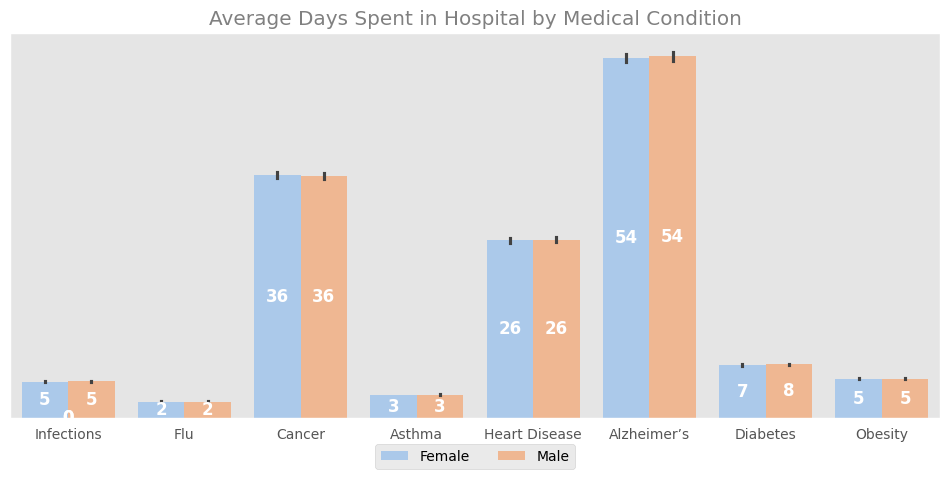

In [41]:
plt.figure(figsize=(12,5))

df['length_of_stay'] = (pd.to_datetime(df['discharge_date']) - pd.to_datetime(df['date_of_admission'])).dt.days

ax = sns.barplot(x='medical_condition', y='length_of_stay', hue='gender', data=df, palette='pastel')
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.50),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')
        
plt.title('Average Days Spent in Hospital by Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

In [42]:
Which medical conditions require longer hospital stays, and what are the typical hospitalization durations for each condition?

length_of_stay_by_medical_condition = np.floor(df.groupby('medical_condition')['length_of_stay'].mean().sort_values(ascending=False)).astype(int)

def days(x):
    return f"{x} Days"

formatted_length_of_stay_by_medical_condition = length_of_stay_by_medical_condition.apply(days)

formatted_length_of_stay_by_medical_condition

Object `condition` not found.


medical_condition
Alzheimer’s      54 Days
Cancer           36 Days
Heart Disease    26 Days
Diabetes          8 Days
Obesity           5 Days
Infections        5 Days
Asthma            3 Days
Flu               2 Days
Name: length_of_stay, dtype: object

<h3 style="margin-bottom: 10px; font-weight: bold;">Insights on Hospitalization Durations by Medical Condition</h3>
<div style="font-size: 16px; padding: 8px; border-radius: 2px; border-left: 5px solid white; margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><b>Alzheimer’s</b> patients have the longest average hospital stays, with a typical duration of <b>54 days</b>. This reflects the complex, long-term nature of managing cognitive decline and associated complications.
</li>
        <li><b>Cancer</b> patients follow with an average stay of <b>36 days</b>, likely due to scheduled treatments such as chemotherapy, radiation, or surgical recovery.
</li>
        <li><b>Heart Disease</b> results in an average hospitalization of <b>26 days</b>, consistent with the intensive care and monitoring required after events like heart attacks or surgeries.
</li>
        <li><b>Diabetes</b> requires a shorter stay of about <b>8 days</b>, often for stabilization during acute episodes or complications like infections.
</li>
        <li><b>Obesity</b> and <b>Infections</b> both average around <b>5 days</b>, suggesting relatively shorter inpatient care, potentially for evaluations, minor procedures, or infection management.
</li>
        <li><b>Asthma</b> has an average stay of <b>3 days</b>, indicating quick stabilization and discharge after respiratory distress.
</li>
        <li><b>Flu</b> results in the shortest hospital stays, averaging just <b>2 days</b>, typical of short-term observation and recovery in otherwise stable patients.
</li>
    </ul>
</div>

Would appreciate an upvote if it was useful to you and please let me know of any possible improvements.